**Problem Statement:**
As a data scientist in a global finance company, the task at hand is to develop an intelligent system for segregating individuals into credit score brackets. This system aims to streamline the process and reduce manual efforts involved in assessing creditworthiness. The project involves utilizing various machine learning models to classify individuals based on their credit-related information.

**Project Workflow:**

1) *Data Import and Exploratory Data Analysis (EDA):*


*   The first step involves importing the dataset containing basic bank details and credit-related information.

*   Exploratory Data Analysis (EDA) is conducted to gain insights into the dataset's structure, distribution, and key features.

*   Basic statistics such as mean, median, and standard deviation are calculated to understand the central tendencies and spread of numerical features.
*   Visualizations such as histograms, box plots, and scatter plots are generated to visualize the distribution and relationships between variables.

2) *Data Preprocessing:*


*   Handling Missing Values: Null values are identified and treated through methods such as imputation or dropping rows/columns with missing data.
*   Handling Duplicates: Duplicate records are identified and removed to ensure data integrity and accuracy.

3) *Bivariate Analysis and Multicollinearity Analysis:*


*   Bivariate analysis is performed to examine relationships between pairs of variables, particularly between independent and dependent variables.
*   Multicollinearity analysis is conducted to identify and address high correlations between independent variables, which could lead to biased model estimates.

4) *Heat Map Visualization:*


*   A heat map is generated to visually represent the correlation matrix of numerical features.
*   This heat map provides insights into the strength and direction of correlations between variables, helping to identify potential multicollinearity issues.


5) *Handling Outliers and Numerical Data:*


*   Outliers in numerical features are identified and treated using techniques such as trimming, winsorization, or transformation.
*   Numerical data is scaled or normalized to ensure uniformity and improve model performance.

6) *Categorical Data Encoding:*


*   Categorical variables are encoded into numerical format as machine learning models typically require numerical inputs.
*   Techniques such as one-hot encoding or label encoding are used to convert categorical variables into numerical representations.

*   Categorical data encoding is crucial as machine learning models only accept numerical inputs. By converting categorical variables into numerical format, the models can effectively learn patterns and make accurate predictions.

7) *Model Building and Evaluation:*
Several machine learning models including Logistic Regression, K Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, and Neural Networks are trained on the preprocessed data.
Model performance is evaluated using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

8) *Comparison of Model Performance:*
The training and testing accuracies of all models are compared to identify the most accurate classifier for credit score classification.

**Conclusion:**
By following a systematic approach including data preprocessing, exploratory analysis, model training, and evaluation, the project aims to develop an intelligent credit scoring system that efficiently categorizes individuals based on their credit-related information. The comparison of multiple machine learning models allows for the selection of the most accurate and reliable classifier for the given task.



In [ ]:
import warnings
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.regularizers import l2
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df_c = df.copy()
df_c.drop(['ID' ,'Customer_ID' ,'Month' ,'Name', 'Type_of_Loan', 'Credit_History_Age', 'SSN'], axis=1, inplace=True)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  ob

<Axes: >

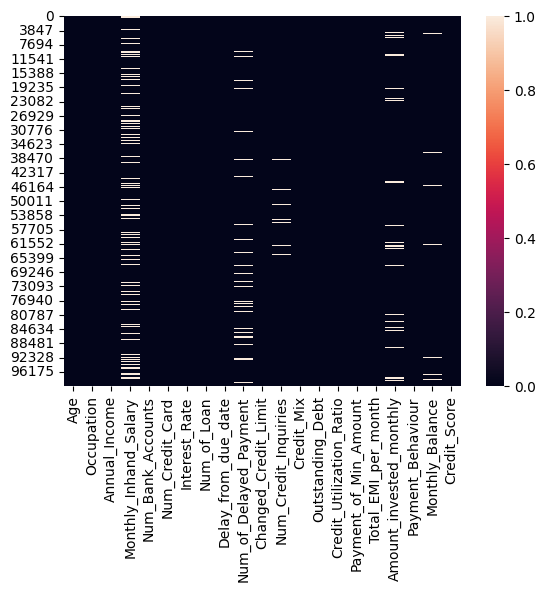

In [ ]:
sns.heatmap(df_c.isnull())

In [ ]:
df_c.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df_c.duplicated().sum()

0

In [ ]:
size_before_cleaning = df_c.shape
df_c = df_c[df_c.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - df_c.shape[0]))

101 Records dropped


In [ ]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)
df_c["Amount_invested_monthly"]=df_c["Amount_invested_monthly"].apply(Amount_invested_monthly)
df_c["Amount_invested_monthly"]=df_c["Amount_invested_monthly"].astype("float")
df_c["Changed_Credit_Limit"]=df_c["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
df_c.drop(df_c[df_c["Changed_Credit_Limit"]=="_"].index,inplace=True)
df_c["Changed_Credit_Limit"]=df_c["Changed_Credit_Limit"].astype("float")
df_c.drop(df_c[df_c["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    df_c[i] = df_c[i].apply(filter_general)
    df_c[i] = df_c[i].astype(np.float64)
    print(i + " Successfully Cleaned")

Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [ ]:
df_c['Num_of_Delayed_Payment'] = df_c['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
df_c['Num_of_Delayed_Payment'] = df_c['Num_of_Delayed_Payment'].astype(np.float64)
df_c['Occupation'] = df_c['Occupation'].replace('_______', np.nan)
df_c['Occupation'] = df_c['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))
df_c['Credit_Mix'] = df_c['Credit_Mix'].replace('_', np.nan)
df_c['Credit_Mix'] = df_c['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))
df_c['Payment_of_Min_Amount'] = df_c['Payment_of_Min_Amount'].replace('NM', np.nan)
df_c['Payment_of_Min_Amount'] = df_c['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))
df_c['Payment_Behaviour'] = df_c['Payment_Behaviour'].replace('!@9#%8', np.nan)
df_c['Payment_Behaviour'] = df_c['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
    df_c[i].fillna(df_c[i].median(), inplace=True)
df_c['Monthly_Balance'].fillna(df_c['Monthly_Balance'].median(), inplace=True)
df_c.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,97799.000000,97799,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799.000000,97799,97799.000000,97799.000000,97799,97799.000000,97799.000000,97799,97799.000000,97799
unique,nan,15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan,nan,2,nan,nan,6,nan,3
top,nan,Lawyer,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Good,nan,nan,Yes,nan,nan,Low_spent_Small_value_payments,nan,Standard
freq,nan,13316,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,43548,nan,nan,51164,nan,nan,24921,nan,52020
mean,119.985153,nan,175441.663404,4027.005640,17.087404,22.518891,72.289103,10.747370,21.073150,29.809957,10.464173,27.318183,nan,1426.299152,32.282054,nan,1406.498229,615.602370,nan,401.639906,nan
std,687.568412,nan,1422851.517850,2961.624830,117.233274,129.222276,466.472121,61.596415,14.866001,218.435605,6.668569,191.044206,nan,1155.320700,5.114341,nan,8312.094625,2001.490408,nan,212.574825,nan
min,14.000000,nan,7005.930000,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,0.000000,0.000000,nan,0.230000,20.000000,nan,0.000000,0.000000,nan,0.007760,nan
25%,25.000000,nan,19436.305000,1789.873333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,nan,566.080000,28.049940,nan,30.319985,76.913387,nan,270.916082,nan
50%,34.000000,nan,37551.780000,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,nan,1166.230000,32.301174,nan,69.246684,135.770733,nan,336.652588,nan
75%,42.000000,nan,72740.960000,5371.220000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.860000,9.000000,nan,1945.675000,36.491492,nan,161.373123,254.946349,nan,467.500431,nan


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>],
       [<Axes: title={'center': 'Num_Credit_Card'}>,
        <Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>]], dtype=object)

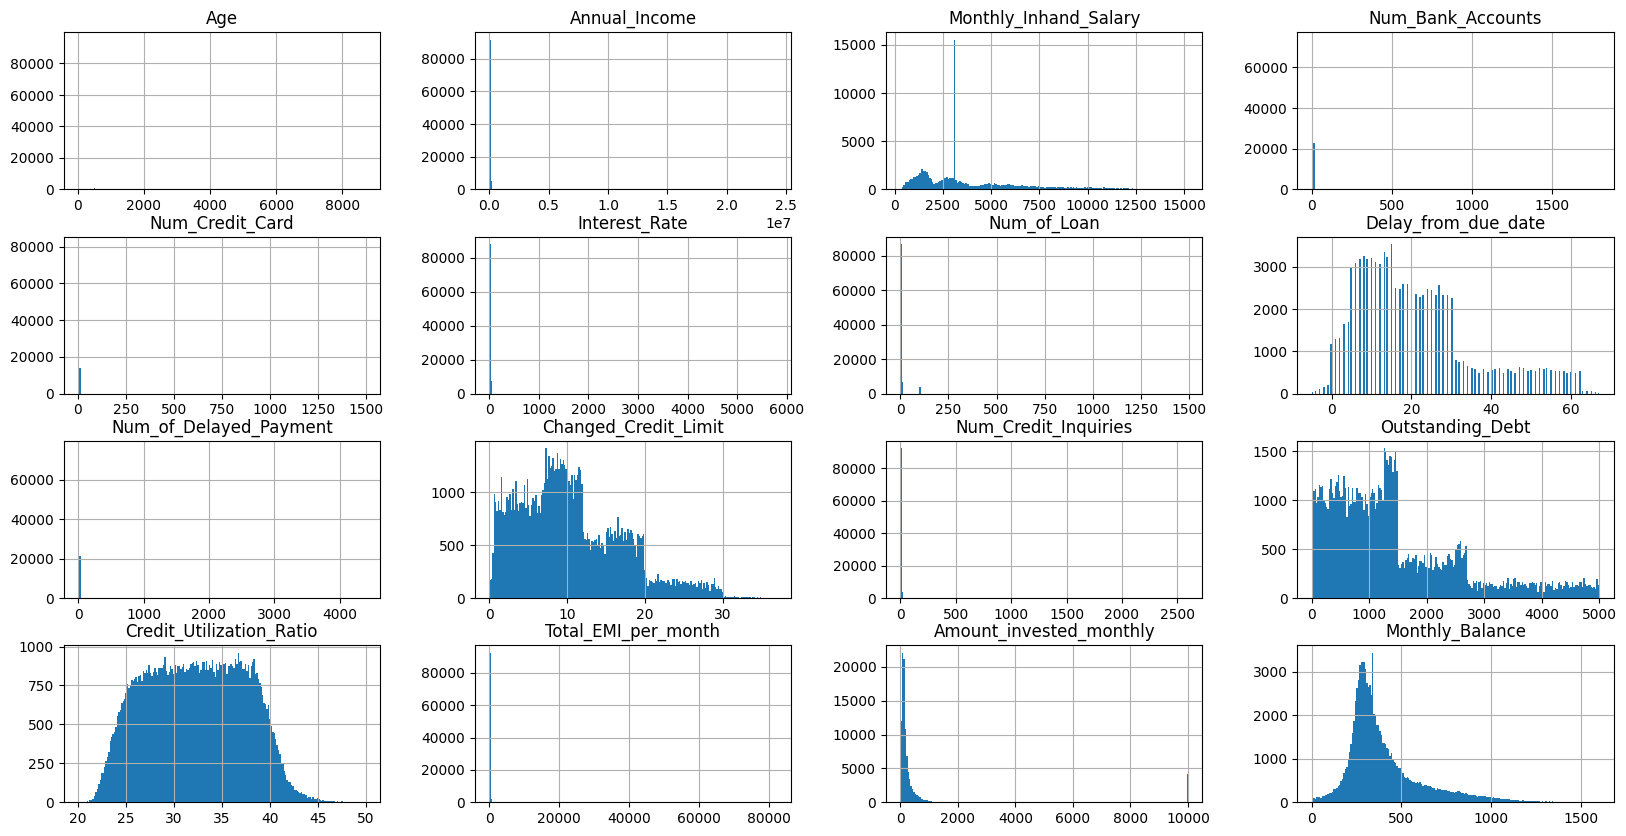

In [ ]:
df_c.hist(bins=200,figsize=[20,10])

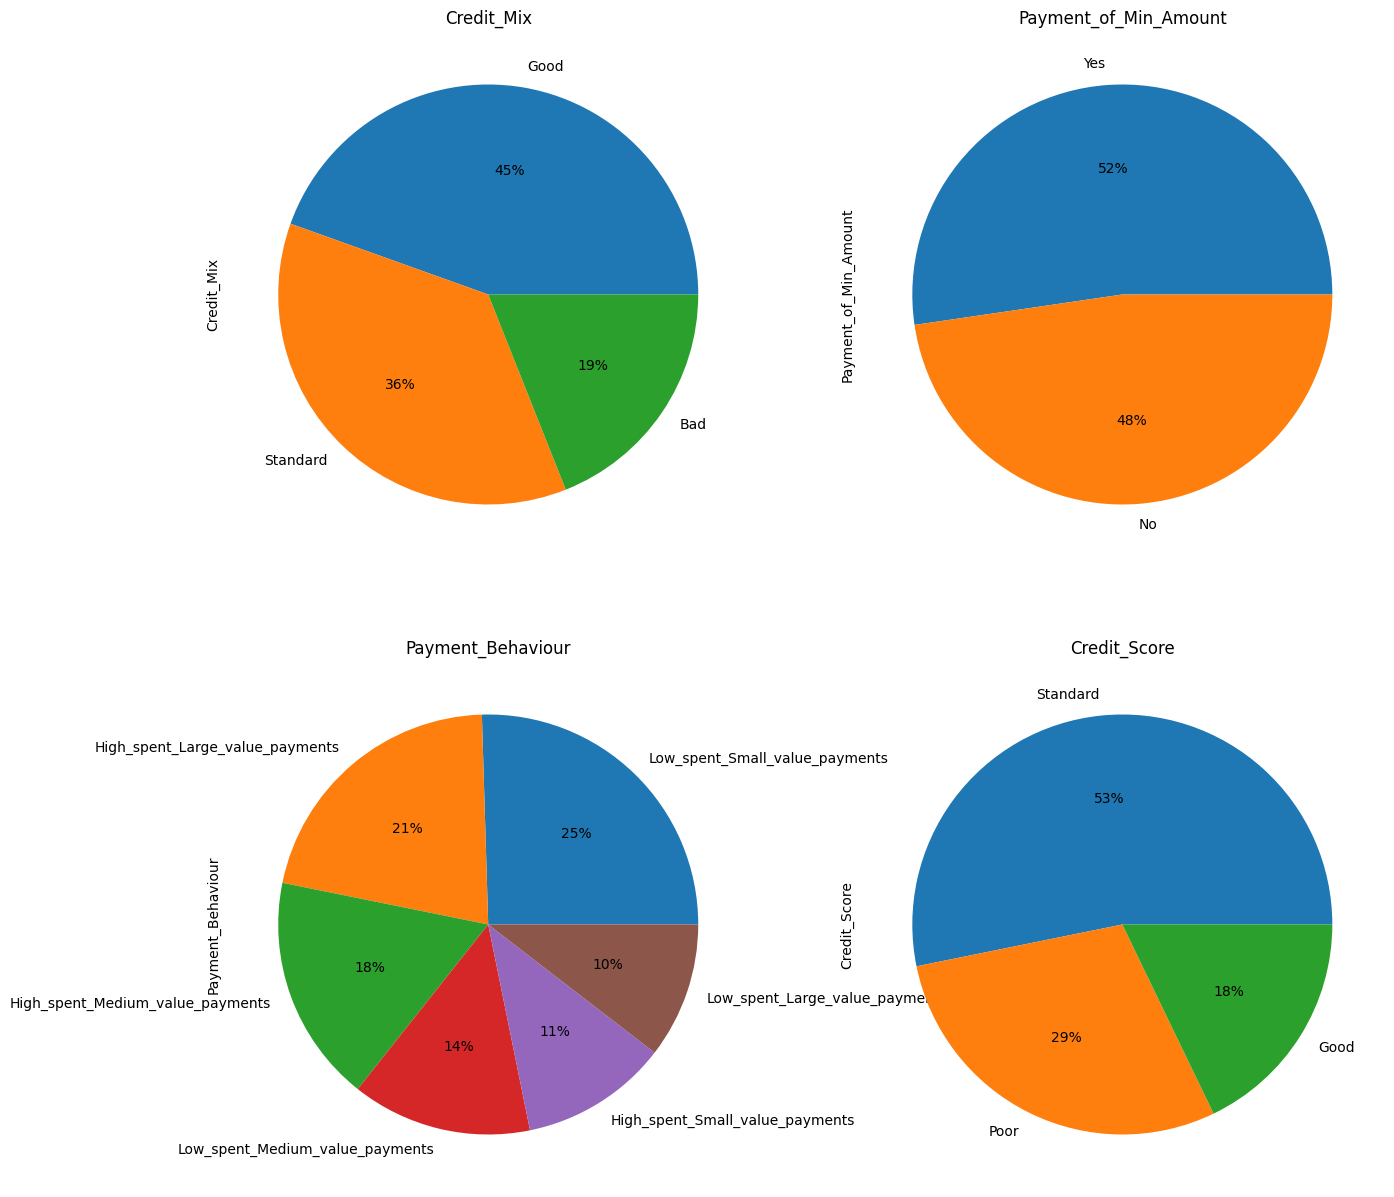

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()
pie_plot(df_c, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

In [ ]:
df_c.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,-1,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,23.0,Scientist,19114.12,3091.000000,3,4,3,4.0,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,High_spent_Large_value_payments,340.479212,Good


In [ ]:
numeric_cols = df_c.select_dtypes(exclude = "object").columns
cat_cols = df_c.select_dtypes(include = "object").columns
print(numeric_cols)
print(cat_cols)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


<Axes: xlabel='Occupation', ylabel='count'>

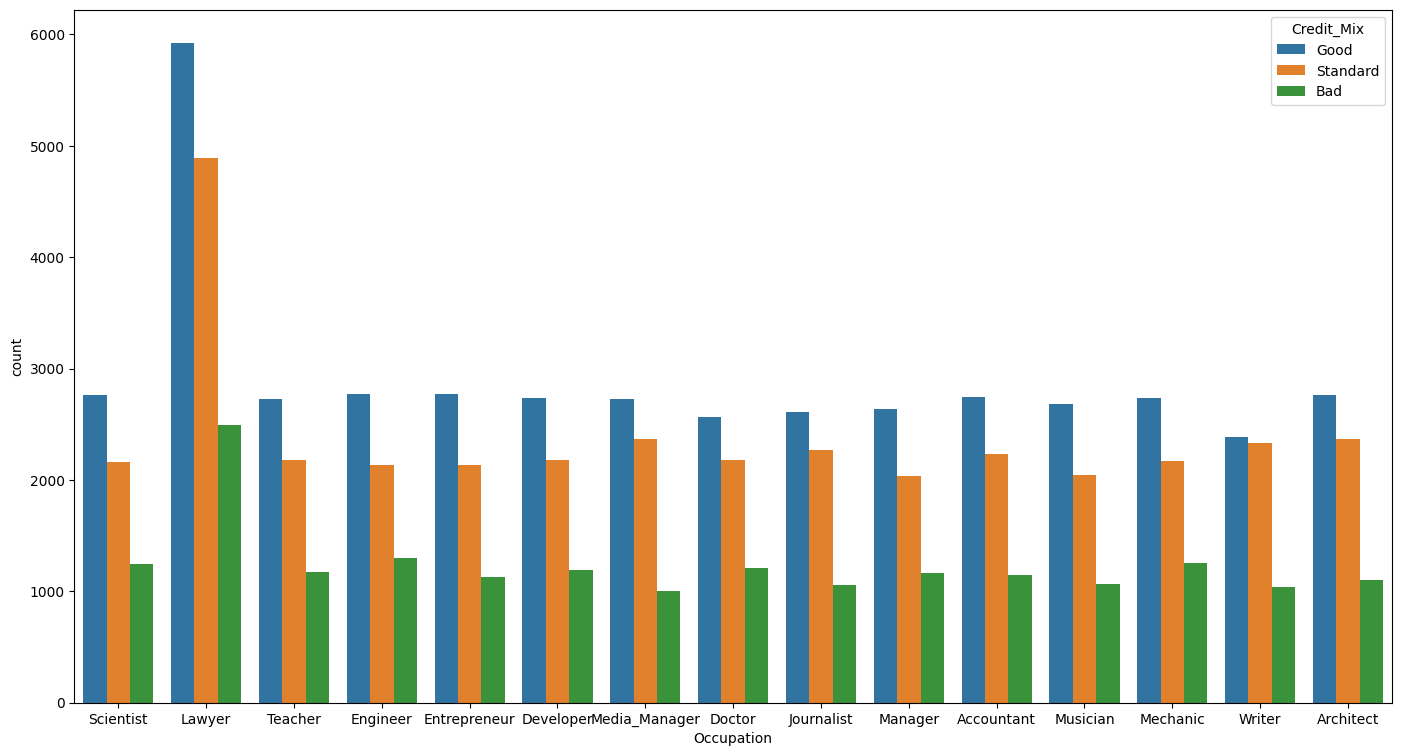

In [ ]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Credit_Mix")

<Axes: xlabel='Occupation', ylabel='count'>

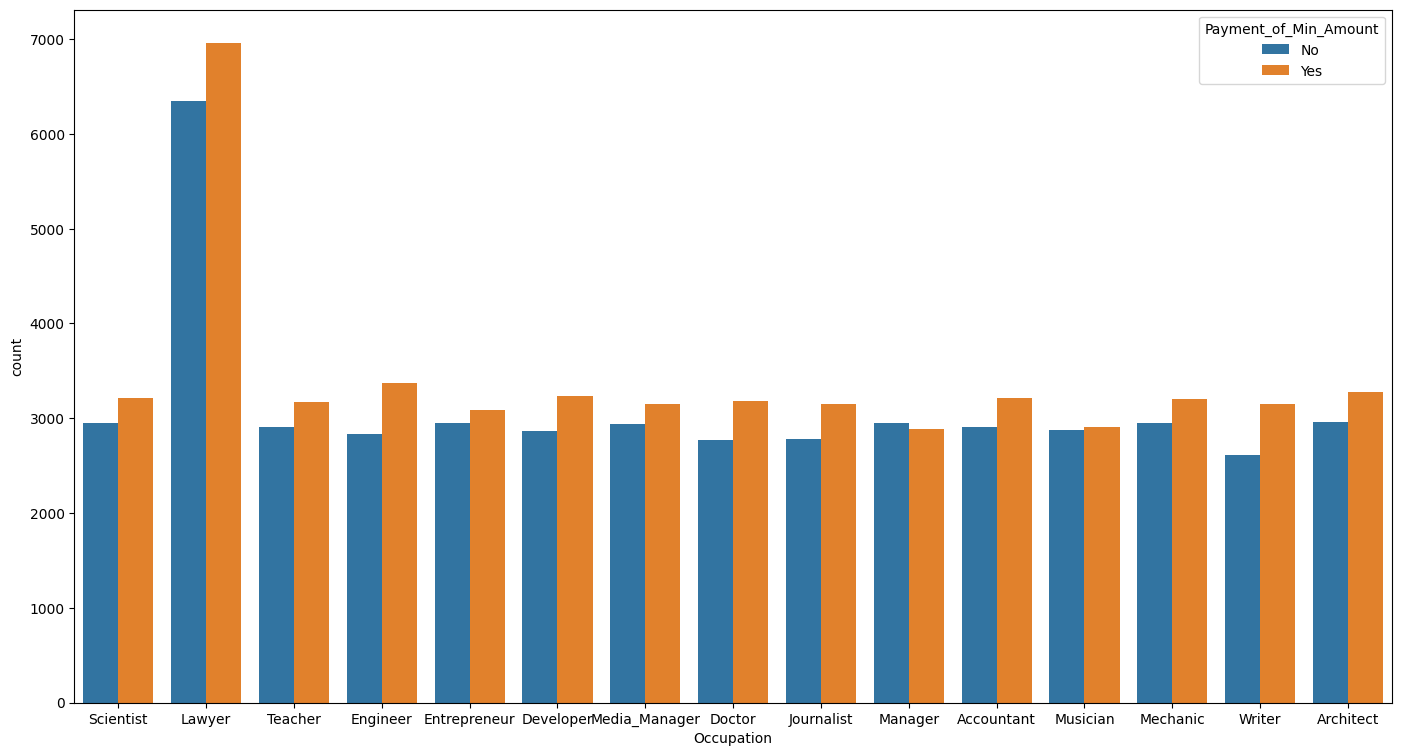

In [ ]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Payment_of_Min_Amount")

<Axes: xlabel='Occupation', ylabel='count'>

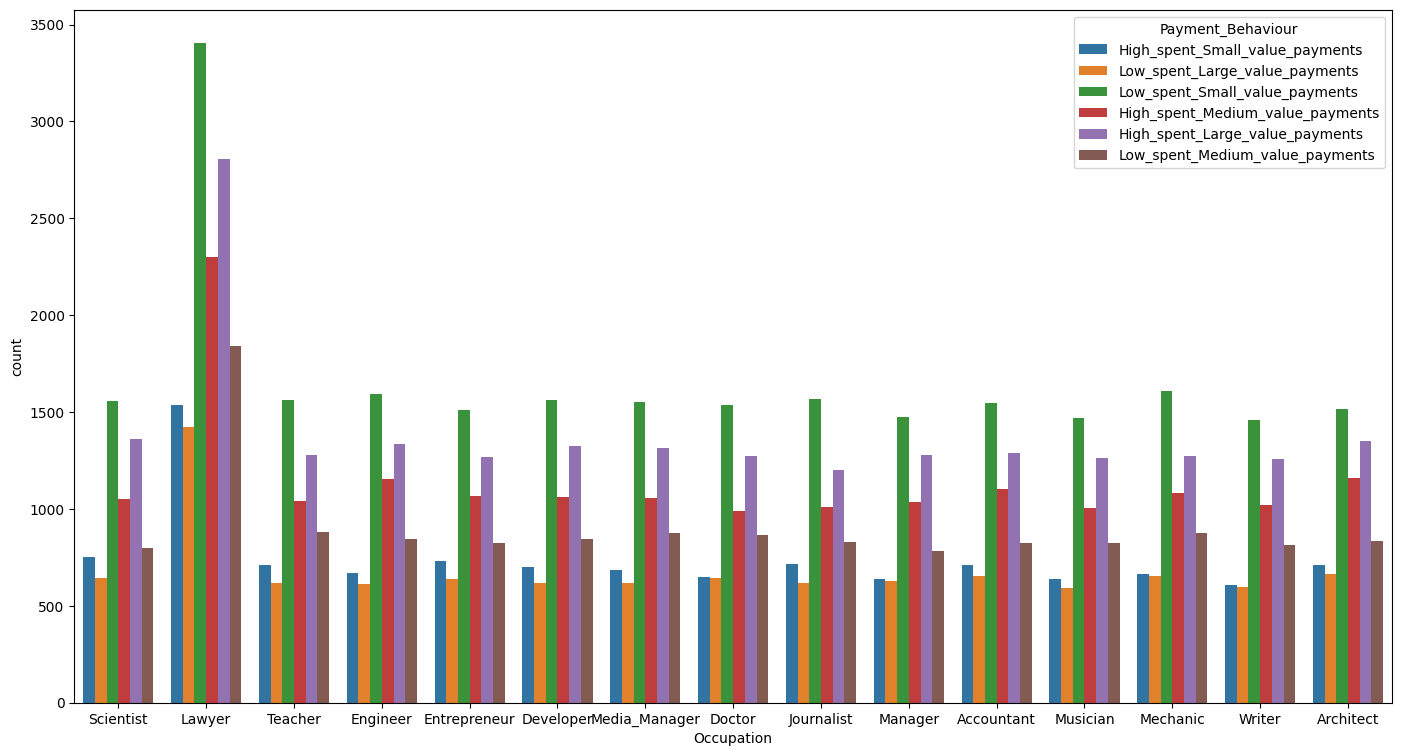

In [ ]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

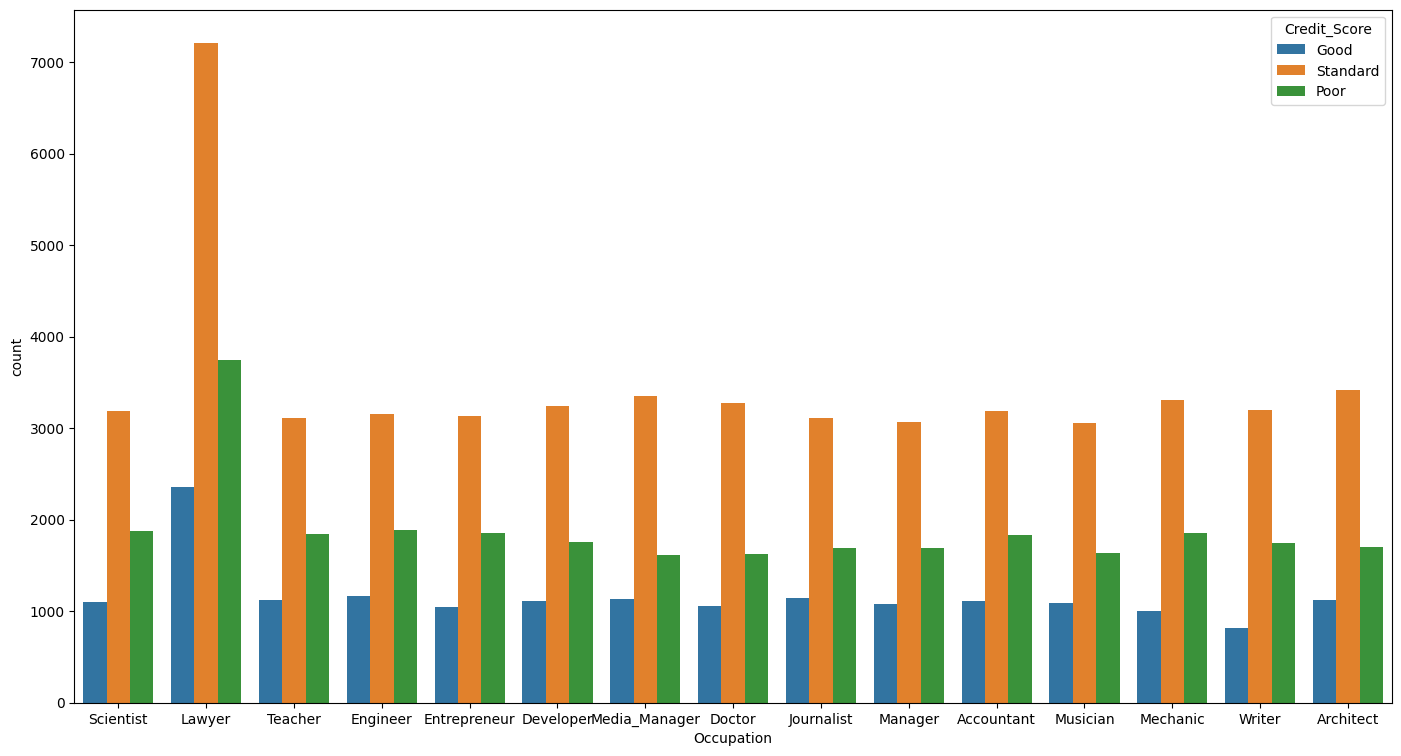

In [ ]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df_c,x="Occupation",hue="Credit_Score")

In [ ]:
vif_df = df_c[numeric_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,Age,1.030047
1,Annual_Income,1.016152
2,Monthly_Inhand_Salary,4.751792
3,Num_Bank_Accounts,1.021315
4,Num_Credit_Card,1.029829
5,Interest_Rate,1.023865
6,Num_of_Loan,1.030466
7,Delay_from_due_date,4.436032
8,Num_of_Delayed_Payment,1.018732
9,Changed_Credit_Limit,4.290441


<Axes: >

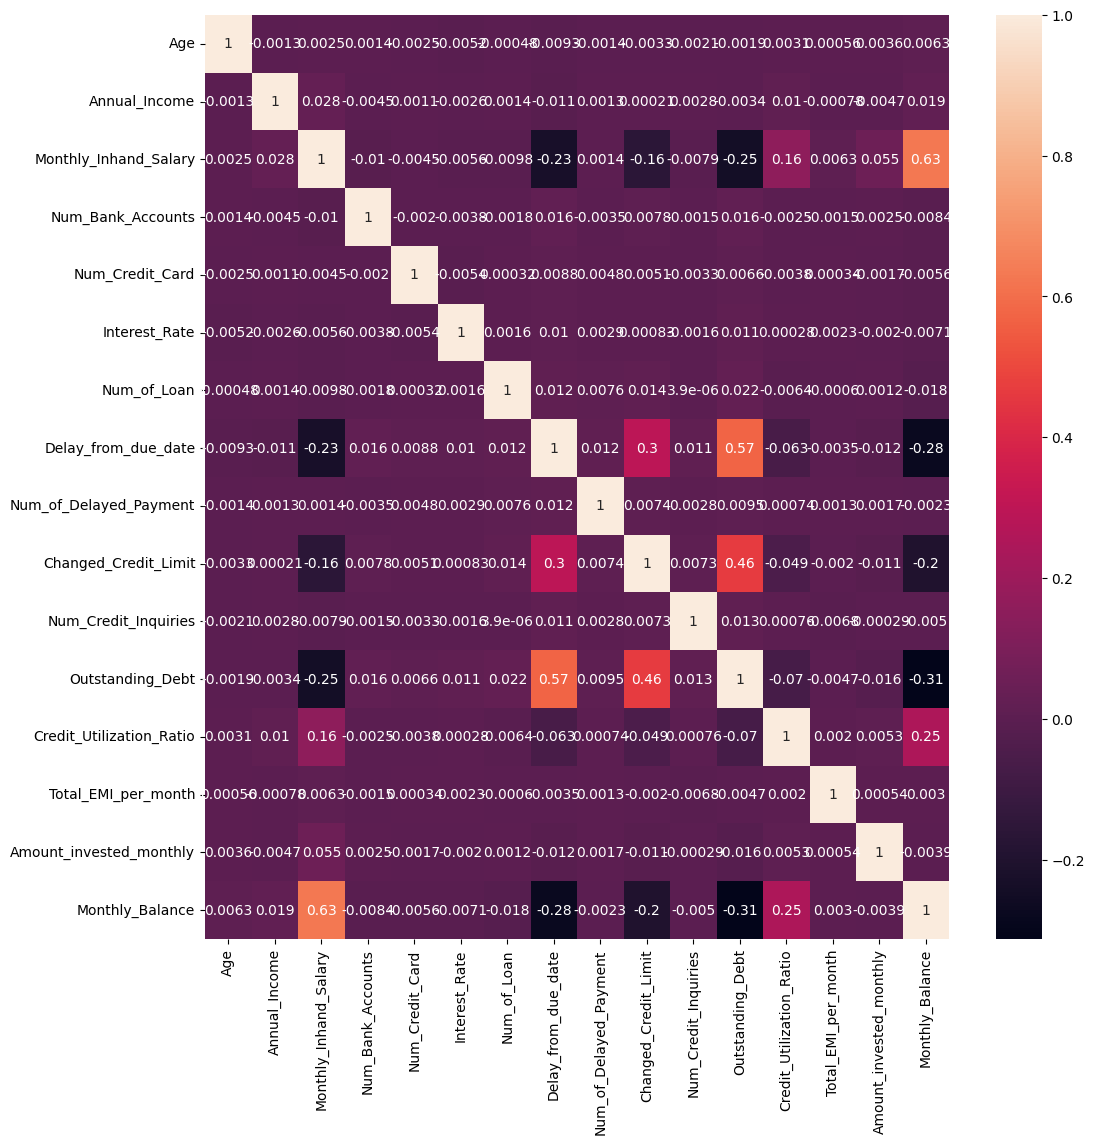

In [ ]:
plt.figure(figsize= (12,12))
sns.heatmap(df_c[numeric_cols].corr(),annot=True)

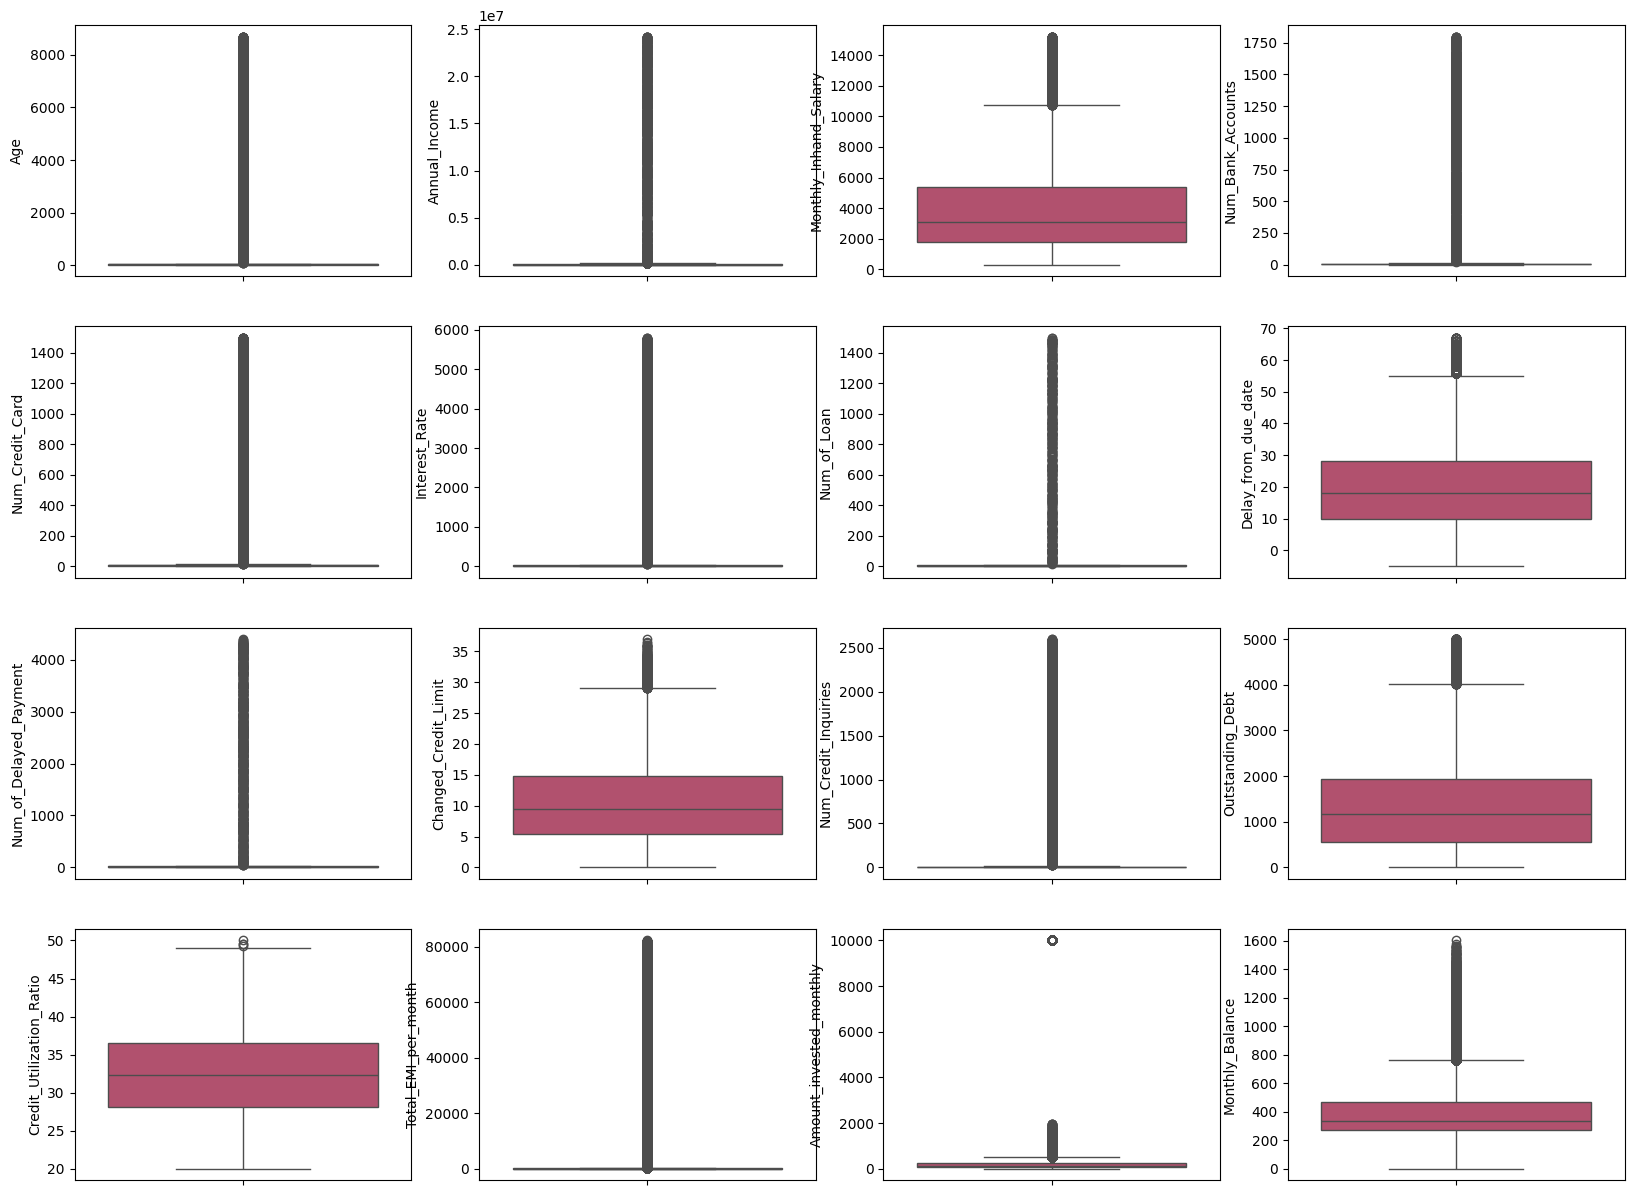

In [ ]:
def box_plot(df_c, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df_c[l], palette="flare")
box_plot(df_c, numeric_cols)

In [ ]:
df_c_n = df_c.copy()
for i in numeric_cols:
    ''' Detection '''
    # IQR
    Q1 = np.percentile(df_c_n[i], 0.05,interpolation = 'midpoint')
    Q3 = np.percentile(df_c_n[i], 99.95,interpolation = 'midpoint')
    print("@ Feature " + i + "...")
    print("Old Shape: ", df_c_n.shape)
    df_c_n[numeric_cols] = df_c_n[numeric_cols][(df_c_n[i] < Q3) & (df_c_n[i] > Q1)]
    df_c_n.dropna(inplace=True)
    print("New Shape: ", df_c_n.shape)

@ Feature Age...
Old Shape:  (97799, 21)
New Shape:  (96598, 21)
@ Feature Annual_Income...
Old Shape:  (96598, 21)
New Shape:  (96500, 21)
@ Feature Monthly_Inhand_Salary...
Old Shape:  (96500, 21)
New Shape:  (96402, 21)
@ Feature Num_Bank_Accounts...
Old Shape:  (96402, 21)
New Shape:  (92102, 21)
@ Feature Num_Credit_Card...
Old Shape:  (92102, 21)
New Shape:  (90260, 21)
@ Feature Interest_Rate...
Old Shape:  (90260, 21)
New Shape:  (88056, 21)
@ Feature Num_of_Loan...
Old Shape:  (88056, 21)
New Shape:  (79171, 21)
@ Feature Delay_from_due_date...
Old Shape:  (79171, 21)
New Shape:  (79076, 21)
@ Feature Num_of_Delayed_Payment...
Old Shape:  (79076, 21)
New Shape:  (78994, 21)
@ Feature Changed_Credit_Limit...
Old Shape:  (78994, 21)
New Shape:  (78909, 21)
@ Feature Num_Credit_Inquiries...
Old Shape:  (78909, 21)
New Shape:  (74152, 21)
@ Feature Outstanding_Debt...
Old Shape:  (74152, 21)
New Shape:  (74068, 21)
@ Feature Credit_Utilization_Ratio...
Old Shape:  (74068, 21)
New 

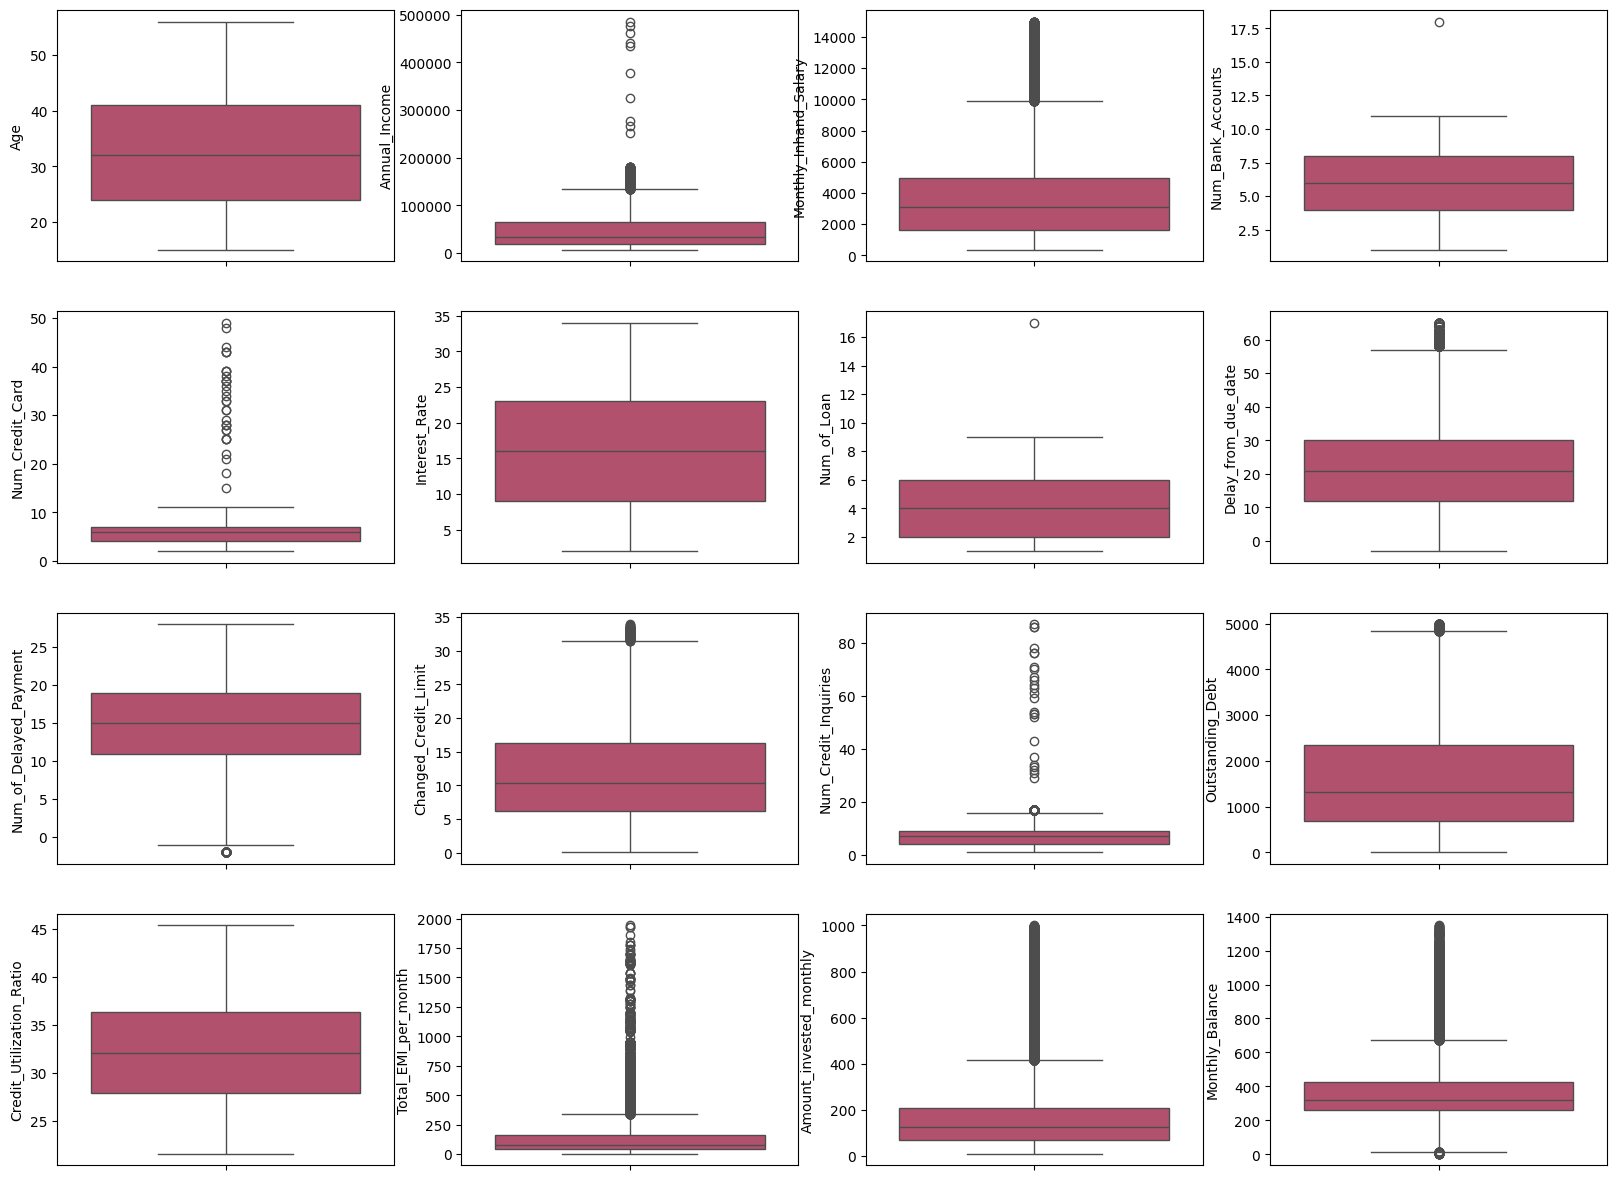

In [ ]:
df_c_n.drop(df_c_n[df_c_n["Age"] >= 80].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Annual_Income"] >= 500000].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Bank_Accounts"] >= 20].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Credit_Card"] >= 50].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_of_Loan"] >= 20].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Interest_Rate"] >= 35].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_of_Delayed_Payment"] >= 30].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Num_Credit_Inquiries"] >= 100].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Total_EMI_per_month"] >= 2000].index, inplace=True)
df_c_n.drop(df_c_n[df_c_n["Amount_invested_monthly"] >= 1000].index, inplace=True)
box_plot(df_c_n, numeric_cols)

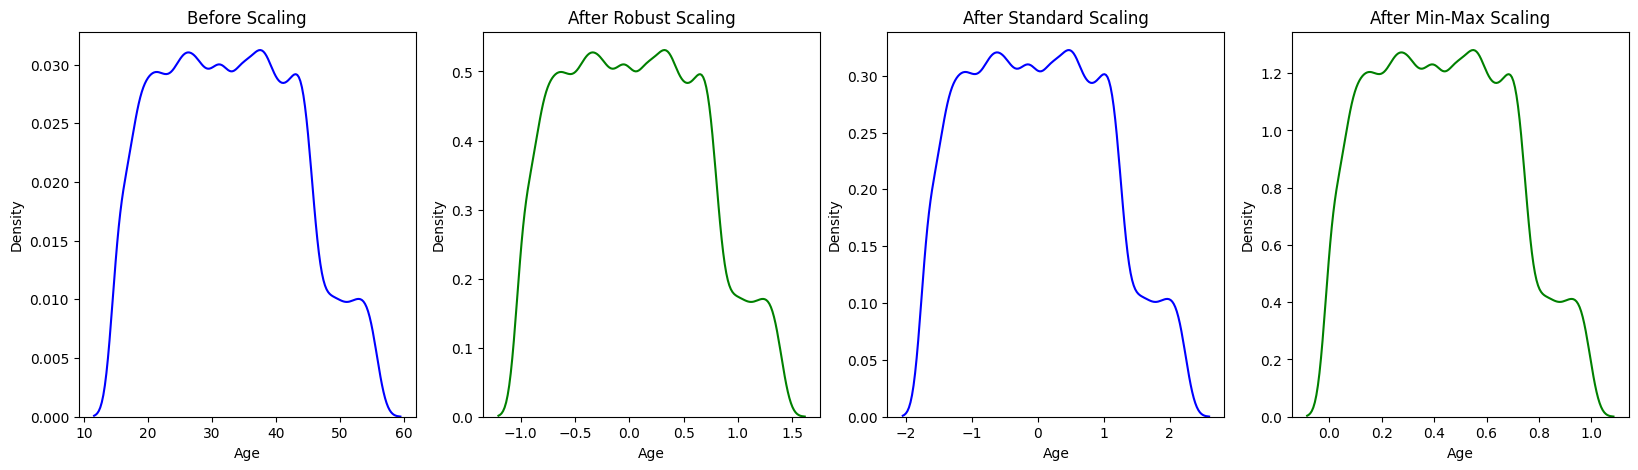

In [ ]:
df_num_clean = df_c_n[numeric_cols].copy()
cols = numeric_cols
scaler = preprocessing.RobustScaler()
robust_df_ = scaler.fit_transform(df_num_clean)
robust_df_ = pd.DataFrame(robust_df_, columns =cols)

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df_num_clean)
standard_df = pd.DataFrame(standard_df, columns =cols)

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df_num_clean)
minmax_df = pd.DataFrame(minmax_df, columns =cols)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(df_num_clean['Age'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df_['Age'], ax = ax2, color ='g')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['Age'], ax = ax3, color ='b')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['Age'], ax = ax4, color ='g')
plt.show()

In [ ]:
def RobustScaling(df_num, cols):
    scaler = preprocessing.RobustScaler()
    robust_df_temp = scaler.fit_transform(df_num)
    robust_df_temp = pd.DataFrame(robust_df_temp, columns =cols)
    return robust_df_temp
robust_scaled = RobustScaling(df_num_clean, numeric_cols)
robust_scaled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445
1,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173
2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.888889,-1.375,-0.399405,-0.6,-0.312965,-0.084491,-0.223513,0.526322,-0.589813
3,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167
4,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015


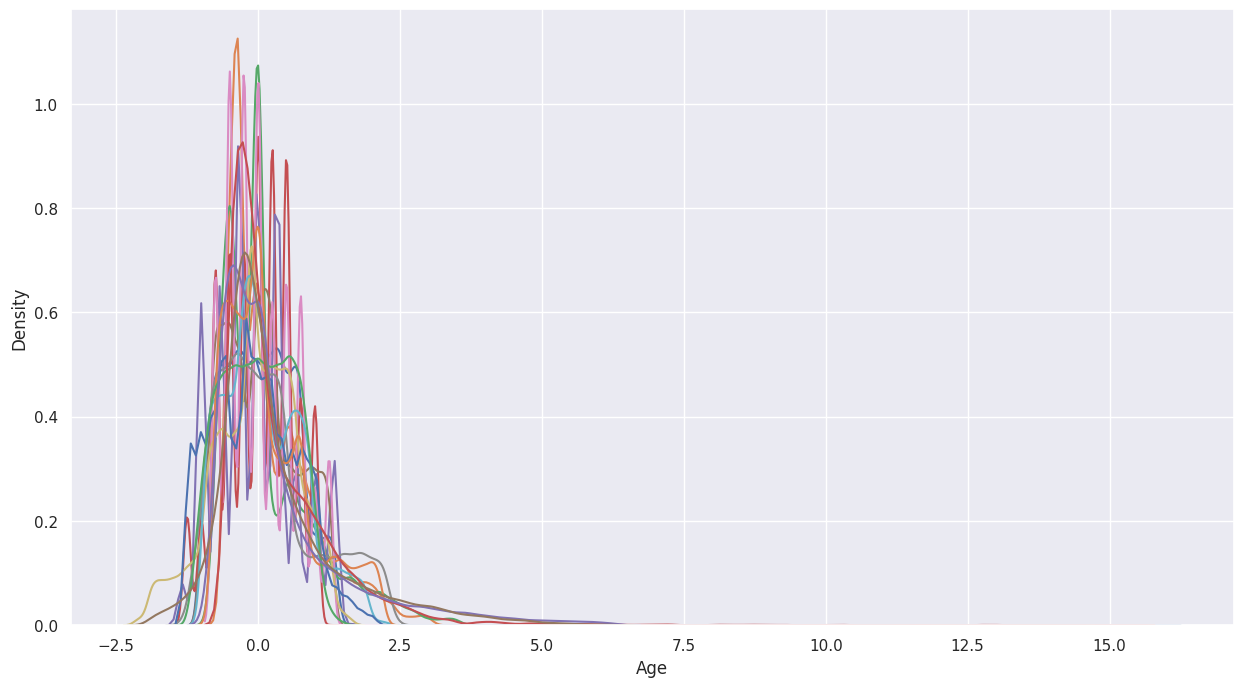

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(robust_scaled[i], legend=True)

In [ ]:
clean_df = df_c.copy()
clean_df.drop(labels=numeric_cols, axis="columns", inplace=True)
clean_df[numeric_cols] = robust_scaled[numeric_cols]
clean_df.head()

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,Scientist,Good,No,High_spent_Small_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015
5,Scientist,Good,No,High_spent_Large_value_payments,Good,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-0.875,0.096135,-0.6,-0.312965,-1.133676,-0.223513,0.372894,-0.461205


In [ ]:
clean_df['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
clean_df['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
clean_df = pd.get_dummies(clean_df, columns = ['Occupation', 'Payment_Behaviour'])
for i in numeric_cols:
    clean_df[i].fillna(method='ffill', inplace=True)
clean_df.head()

,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-1.000,0.096135,-0.6,-0.312965,-0.625118,-0.223513,-0.338718,-0.047445,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-1.222222,-0.125,0.096135,-0.6,-0.312965,-0.017187,-0.223513,-0.063568,-0.217173,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-0.833333,-0.125,0.096135,-0.6,-0.312965,-0.865483,-0.223513,-0.622082,0.129167,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,2,0,2,-0.529412,-0.336516,0.000000,-0.75,-0.666667,-0.928571,0.0,-0.722222,-1.375,-0.102081,-0.6,-0.312965,-0.572941,-0.223513,-0.469410,0.123015,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5,2,0,2,-0.529412,-0.336516,-0.383675,-0.75,-0.666667,-0.928571,0.0,-1.000000,-0.875,0.096135,-0.6,-0.312965,-1.133676,-0.223513,0.372894,-0.461205,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


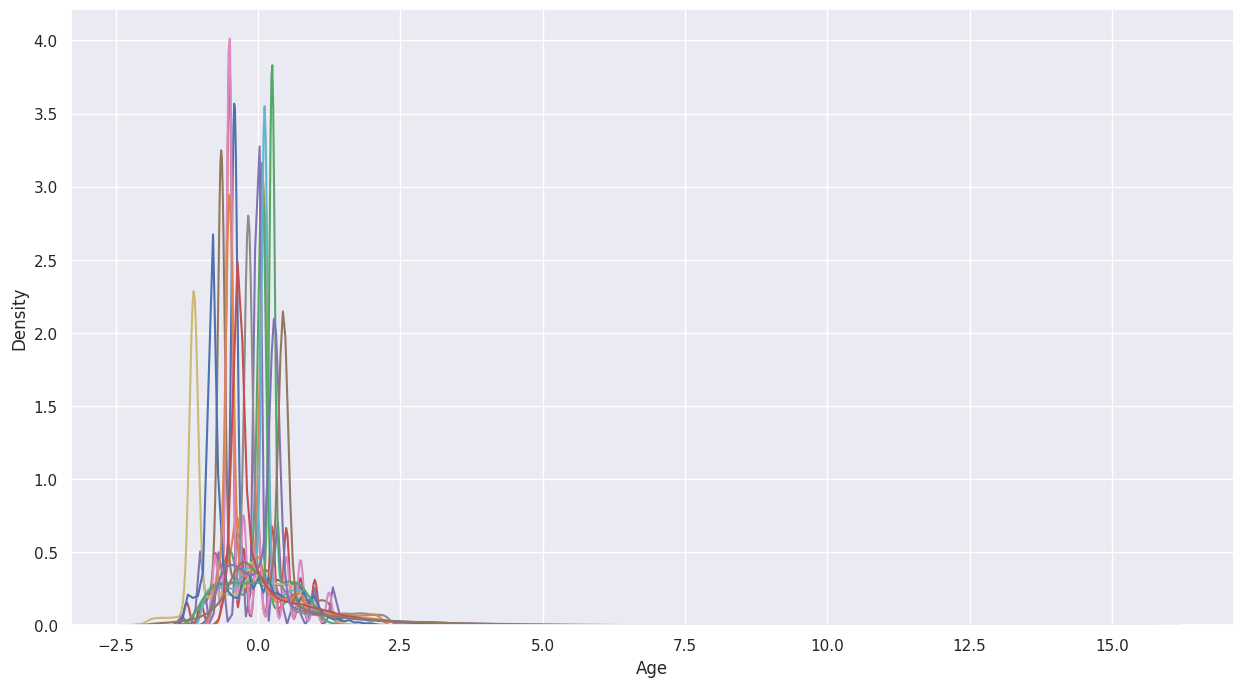

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in numeric_cols:
    sns.kdeplot(clean_df[i], legend=True)

In [ ]:
x_clean = clean_df.drop(['Credit_Score'] , axis = 1).values
y_clean = clean_df['Credit_Score'].values

In [ ]:
pca = PCA(n_components=0.98)
x_reduced = pca.fit_transform(x_clean)
print("Number of original features is {} and of reduced features is {}".format(x_clean.shape[1], x_reduced.shape[1]))


Number of original features is 39 and of reduced features is 34


In [ ]:
x_reduced.shape

(97799, 34)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
df = pd.read_csv('test.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [ ]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(x_reduced, y_clean, test_size=0.2, random_state=42)

In [ ]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression 56.239215736397455  Test Accuracy Logistic Regression 56.05828220858896


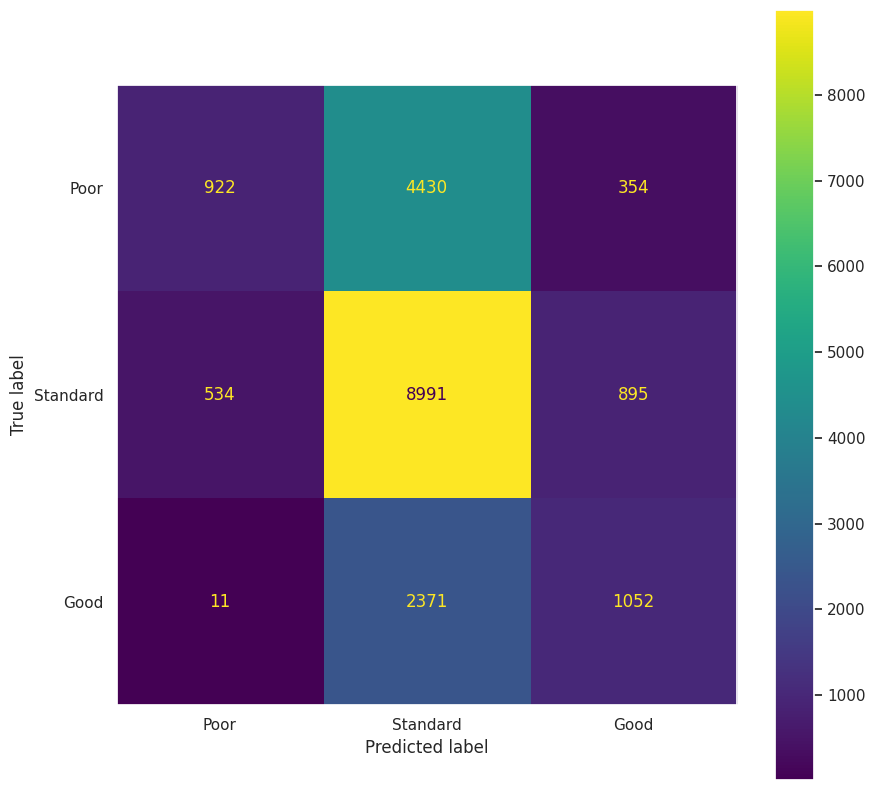

In [ ]:
lr = LogisticRegression().fit(X_train_clean, y_train_clean)
evaluate_classification(lr, "Logistic Regression", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Accuracy KNeighborsClassifiern 61.733917867048405  Test Accuracy KNeighborsClassifiern 58.691206543967276


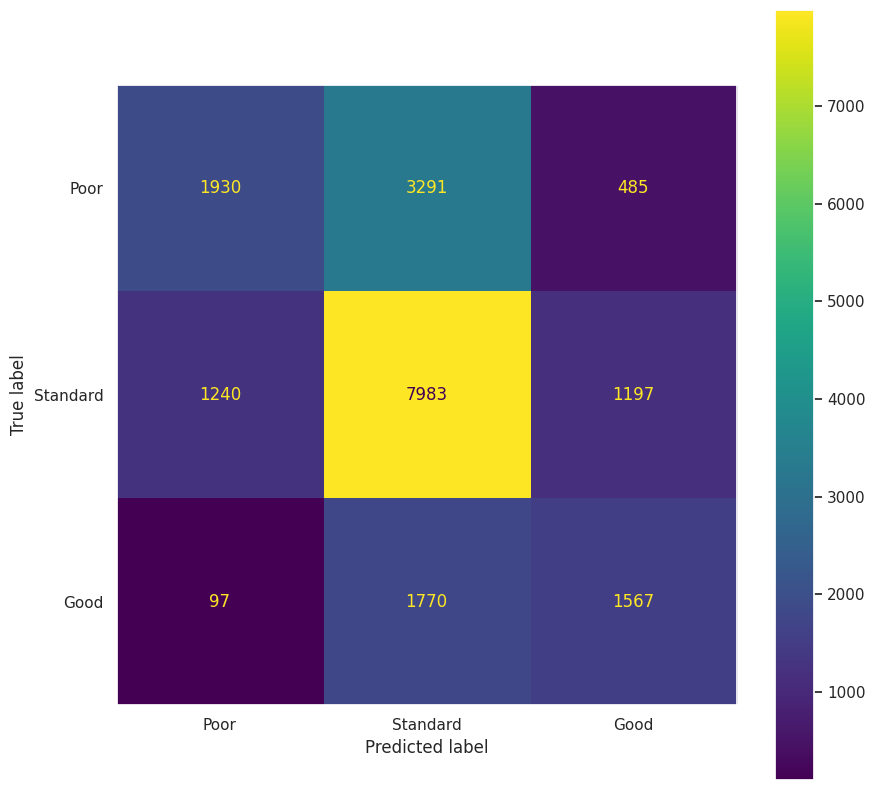

In [ ]:
knn = KNeighborsClassifier(25).fit(X_train_clean, y_train_clean)
evaluate_classification(knn, "KNeighborsClassifiern", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Accuracy Naive Bayes 57.375477702935875  Test Accuracy Naive Bayes 57.331288343558285


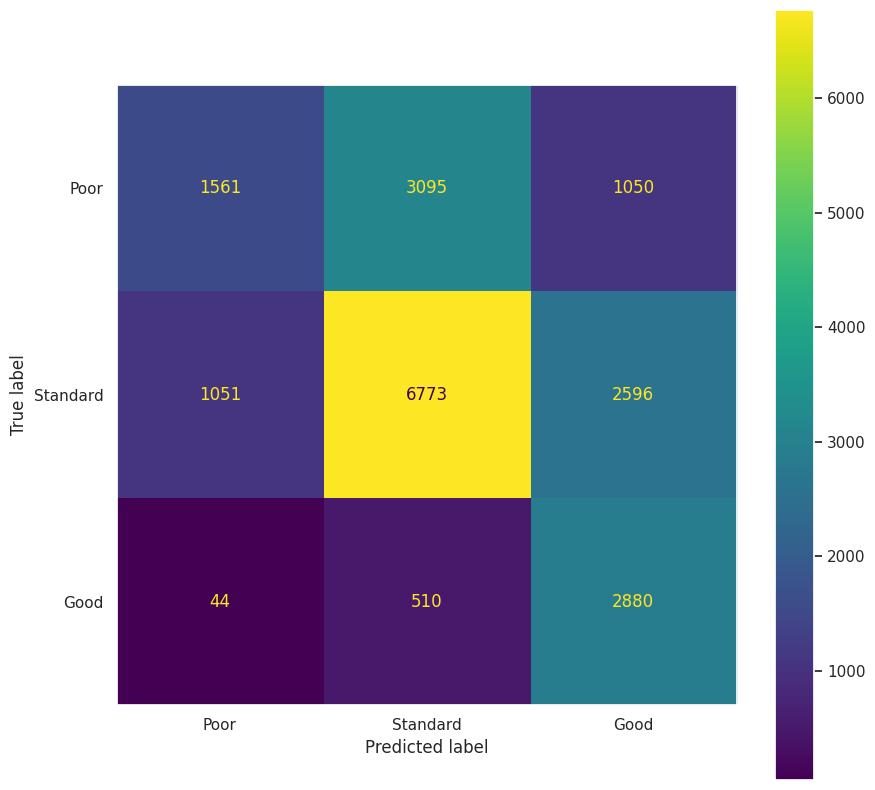

In [ ]:
gnb = GaussianNB().fit(X_train_clean, y_train_clean)
evaluate_classification(gnb, "Naive Bayes", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

Training Accuracy DecisionTreeClassifier 83.15418141847417  Test Accuracy DecisionTreeClassifier 54.902862985685076


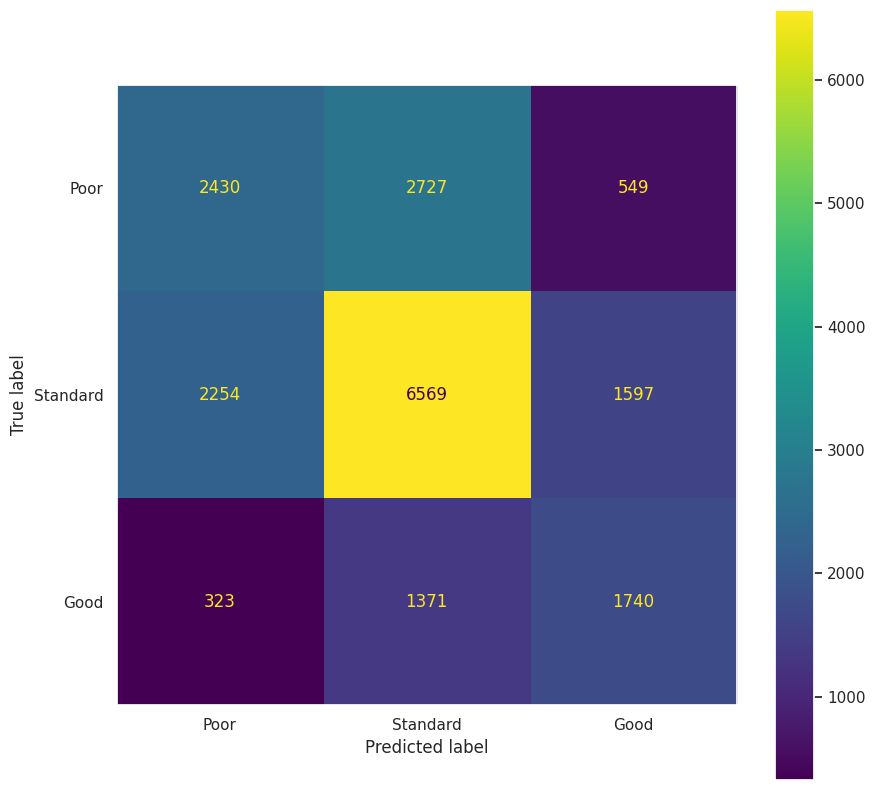

In [ ]:
dt = DecisionTreeClassifier(max_depth=3).fit(X_train_clean, y_train_clean)
tdt = DecisionTreeClassifier().fit(X_train_clean, y_train_clean)
evaluate_classification(tdt, "DecisionTreeClassifier", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

[Text(0.5, 0.875, 'x[3] <= -0.639\ngini = 0.602\nsamples = 78239\nvalue = [22622, 41600, 14017]'),
 Text(0.25, 0.625, 'x[13] <= -0.022\ngini = 0.622\nsamples = 26558\nvalue = [4344, 10370, 11844]'),
 Text(0.125, 0.375, 'x[17] <= -0.072\ngini = 0.508\nsamples = 61\nvalue = [23, 36, 2]'),
 Text(0.0625, 0.125, 'gini = 0.543\nsamples = 43\nvalue = [21, 20, 2]'),
 Text(0.1875, 0.125, 'gini = 0.198\nsamples = 18\nvalue = [2, 16, 0]'),
 Text(0.375, 0.375, 'x[7] <= 0.814\ngini = 0.622\nsamples = 26497\nvalue = [4321, 10334, 11842]'),
 Text(0.3125, 0.125, 'gini = 0.619\nsamples = 21645\nvalue = [3437, 8350, 9858]'),
 Text(0.4375, 0.125, 'gini = 0.632\nsamples = 4852\nvalue = [884, 1984, 1984]'),
 Text(0.75, 0.625, 'x[3] <= 0.728\ngini = 0.508\nsamples = 51681\nvalue = [18278, 31230, 2173]'),
 Text(0.625, 0.375, 'x[13] <= 0.419\ngini = 0.453\nsamples = 36916\nvalue = [9431, 25544, 1941]'),
 Text(0.5625, 0.125, 'gini = 0.481\nsamples = 27878\nvalue = [8350, 18230, 1298]'),
 Text(0.6875, 0.125, 'g

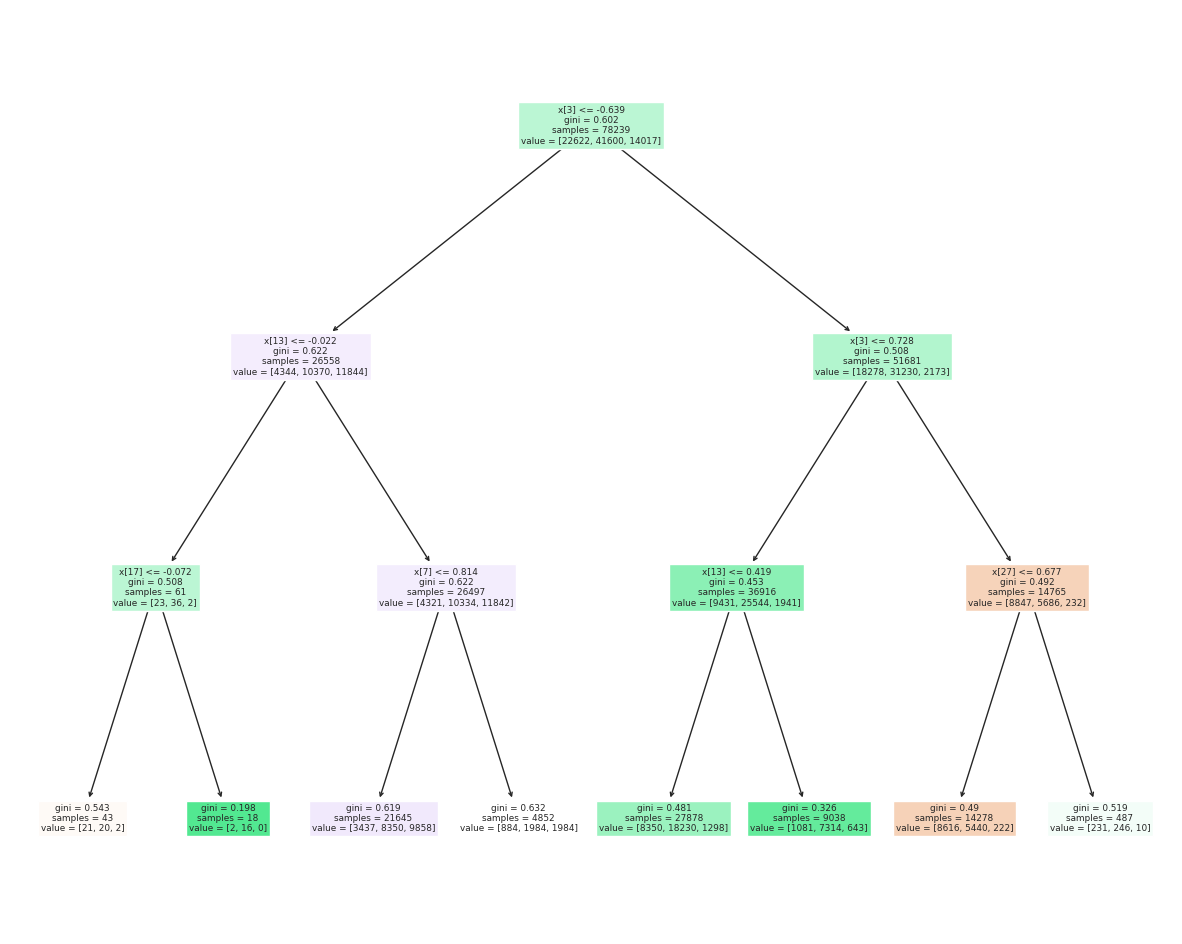

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

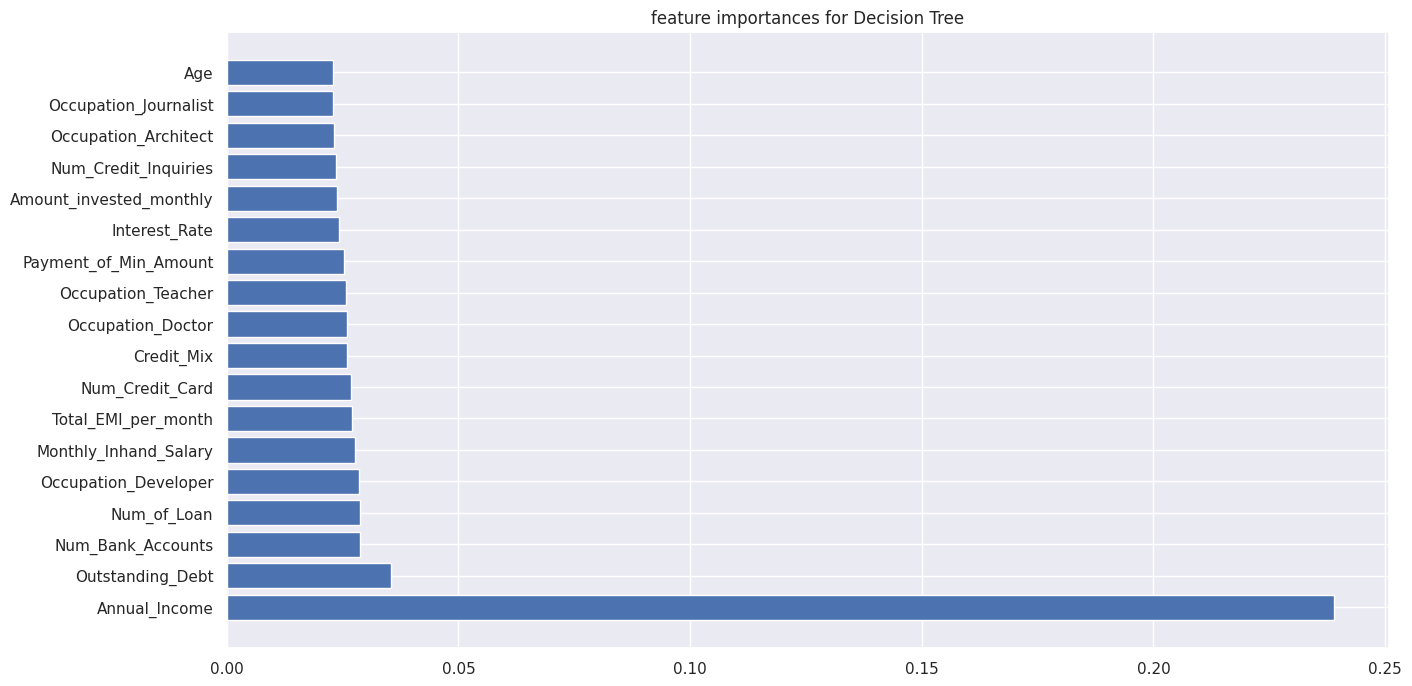

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = clean_df.drop(['Credit_Score'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

Training Accuracy RandomForestClassifier 83.15290328352867  Test Accuracy RandomForestClassifier 61.124744376278116


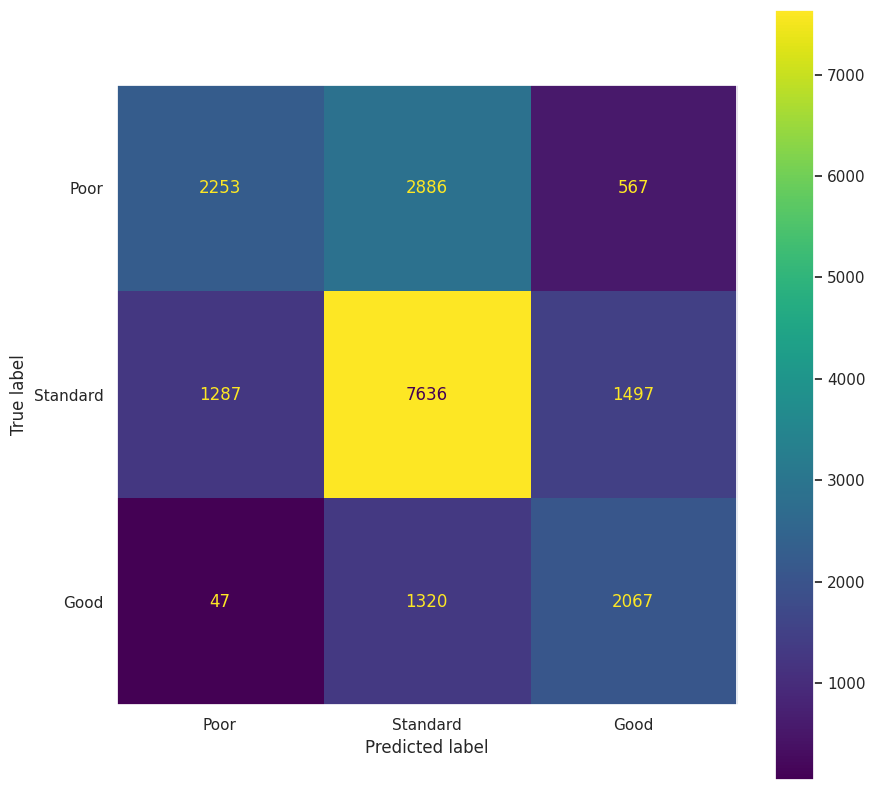

In [ ]:
rf = RandomForestClassifier().fit(X_train_clean, y_train_clean)
evaluate_classification(rf, "RandomForestClassifier", X_train_clean, X_test_clean, y_train_clean, y_test_clean)

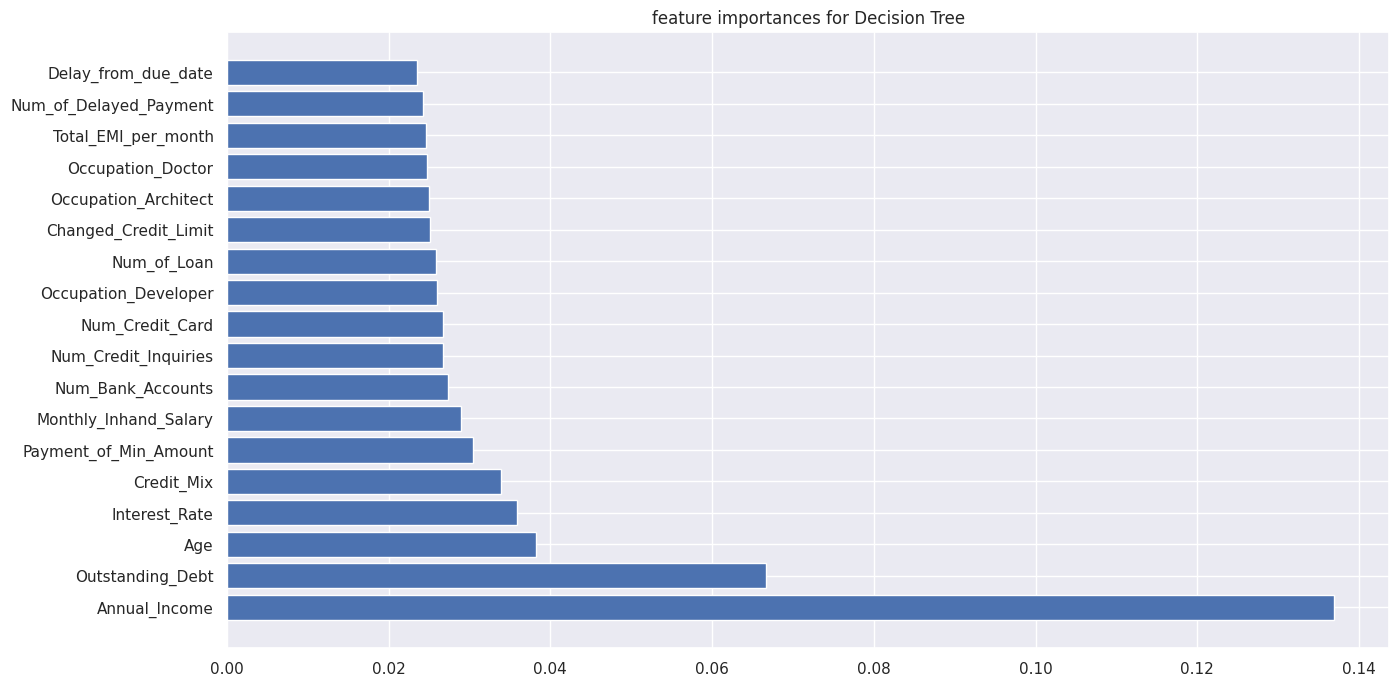

In [ ]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train_clean.shape[1:])),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

 dense (Dense)               (None, 64)                2240      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 43971 (171.76 KB)
Trainable params: 43971 (171.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


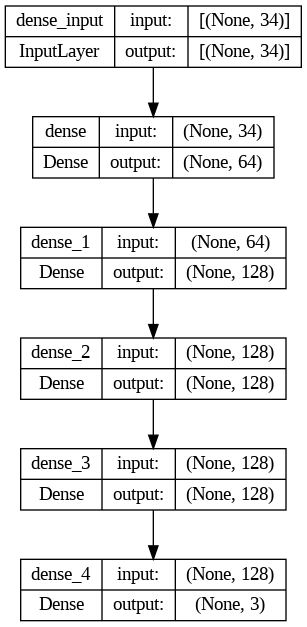

In [ ]:
!pip install keras
!pip install keras-vis
from keras.utils import plot_model

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

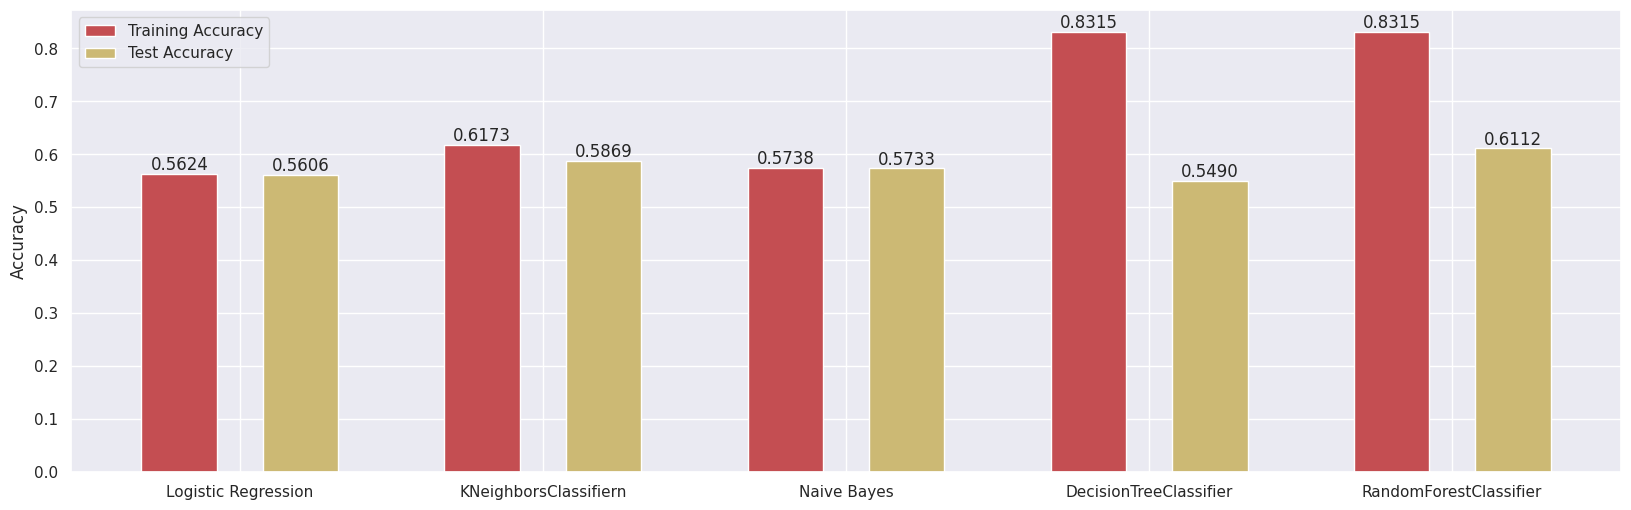

In [ ]:
keys = [key for key in evals.keys()]
values = [value for value in evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='r', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
for i, value in enumerate(values):
    ax.text(i - 0.2, value[0], "{:.4f}".format(round(value[0], 4)), ha='center', va='bottom')
    ax.text(i + 0.2, value[1], "{:.4f}".format(round(value[1], 4)), ha='center', va='bottom')


plt.ylabel("Accuracy")
plt.show()